In [1]:
# Data manipulation  
import numpy as np  
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt  

In [2]:
# st = pd.read_csv('symbols.txt', names=['symbol'], index_col=None)
# sl = st['symbol'].to_list()

In [3]:

all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'AMZN', 'MSFT', 'GOOG', 'FB', 'PG', 'TSLA']}
# all_data = {ticker: web.get_data_yahoo(ticker) for ticker in sl}
# all_data = web.get_data_yahoo('GOOG')
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

In [4]:
def get_stock_price(price_df, symbol):
    df = pd.DataFrame(price_df[symbol])
    df.columns=['close']
    return df

In [9]:
stock = get_stock_price(price, 'TSLA')

In [10]:
stock['high'] = stock['close'].shift(1).rolling(window=5).max()
stock['low'] = stock['close'].shift(1).rolling(window=5).min()
stock['avg'] = stock['close'].shift(1).rolling(window=5).mean()

stock['long_entry'] = stock['close'] > stock['high']
# stock['short_entry'] = stock['close'] < stock['low']
stock['long_exit'] = stock['close'] < stock['avg']
# stock['short_exit'] = stock['close'] > stock['avg'] 

# stock['positions_long'] = np.nan  
# stock.loc[stock['long_entry'],'positions_long']= 1  
# stock.loc[stock['long_exit'],'positions_long']= 0  
# stock['positions_short'] = np.nan  
# stock.loc[stock['short_entry'],'positions_short']= -1  
# stock.loc[stock['short_exit'],'positions_short']= 0  
# stock['Signal'] = stock['positions_long'] + stock['positions_short']  
# stock = stock.fillna(method='ffill') 

In [24]:
daily_log_returns = np.log(stock['close']/stock['close'].shift(1))  
daily_log_returns = daily_log_returns * stock.Signal.shift(1)  

AttributeError: 'DataFrame' object has no attribute 'Signal'

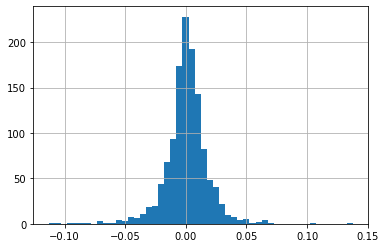

In [15]:
daily_log_returns = np.log(stock['close']/stock['close'].shift(1))  
daily_log_returns = daily_log_returns * stock.Signal.shift(1)  
# Plot the distribution of 'daily_log_returns'  
# print (stock_ticker)  
daily_log_returns.hist(bins=50)  
plt.show()  
# return daily_log_returns.cumsum() 